# Analysis Challenge Assignment 4

**Authors:** Yutong Shen, Jingfei Chen, Yiran Wang

## Social Network Analysis

**Tasks:**

**STEP 1:** After providing some basic information about your network, you will need to define your unit of analysis VERY CLEARLY!

What is a node/vertex in your network (i.e., who is in this network)?

What is an edge/link/tie/arc (i.e., what constitutes the connections)?

**STEP 2:** Visualize the network.

**STEP 3:** Describe the global network properties (e.g., number of vertices, number of edges, graph property, density, diameter).

**STEP 4:** Describe vertices (e.g., degree, betweenness, closeness centrality).

**STEP 5:** Try to detect different communities within your network. Can you explain the communities?

**STEP 6:** Discuss a few important cases (i.e., vertices, edges, and communities).

**STEP 7 (optional):** Incorporated into Step 6. Infer the relationship between network properties (e.g., degree centrality) and some other non-network vertex/edge properties (e.g., learning outcome). You may need to run some inferential statistics for this step.

**STEP 8:** Draw some conclusions about this network.

**Social Network we choose:**

Our team decides to look at the Korean actors and actresses and see the social network in terms of the TV episodes they have commonly played in.

We searched on the internet about the Korean actors and actresses and the TV episodes they played in. Then we hand-labeled the data.

**1. Define the unit of analysis** (what is a vertex and what is an edge)
* Vertex: Popular Korean Actors and Actresses
* Edge: Common TV Episodes played in

In [ ]:
# basic importing
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**2. Visualize the Network**

In [ ]:
SNAdata = pd.read_csv("ACA4.csv", index_col = 0)
G = nx.Graph(SNAdata)

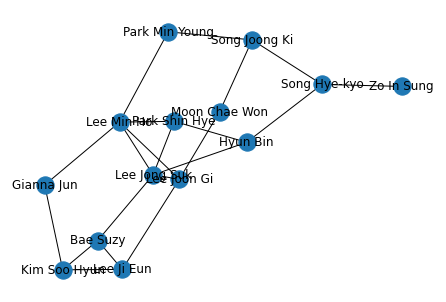

In [ ]:
nx.draw(G, with_labels = True)

**3. Describe the global network properties** (e.g., number of vertices, number of edges, graph property, density, diameter)


### Network Statistics

**Graph Property**

The graph is an undirected network since the actors and actresses are both acting in the TV episodes.

**Number of Vertices and Number of Edges**

The first statistic we will look at is the number of vertices and number of edges.

In [ ]:
print(nx.info(G))

Graph with 14 nodes and 21 edges


**Density**

Density is a measure of how complete the graph is (how many edges are present in the network as compared to the total possible number of edges).

In [ ]:
density = nx.density(G)

print('The edge density is: %.3f' % (density)) ### using a format for the output decimal places                                    

The edge density is: 0.231


This value of 0.231 indicates that this network is connected as we can see more than 23% links among all possible links.

**Diameter**

In [ ]:
diameter = nx.diameter(G)
print("The diameter is:", diameter)

The diameter is: 5


**4. Describe vertices** (e.g., degree, betweenness, closeness)

**Degree Centrality**

This is a common centrality measure, which gives an idea of how 'imporant' each node is in the network. The assumption is that nodes with the most edges are the most important/central as they are directly connected to lots of other nodes. Nodes with a high centrality might be expected to play important roles in network. 

In [ ]:
degree = nx.degree(G)
degree

DegreeView({'Lee Min Ho': 5, 'Song Joong Ki': 3, 'Lee Jong Suk': 5, 'Kim Soo Hyun': 3, 'Lee Joon Gi': 4, 'Zo In Sung': 1, 'Hyun Bin': 3, 'Gianna Jun': 2, 'Song Hye-kyo': 3, 'Park Shin Hye': 3, 'Lee Ji Eun': 3, 'Park Min Young': 2, 'Moon Chae Won': 2, 'Bae Suzy': 3})

Converting the dictionary into a pandas dataframe with from_dict() to visualize it.

In [ ]:
pd.DataFrame(degree)

,0,1
0,Lee Min Ho,5
1,Song Joong Ki,3
2,Lee Jong Suk,5
3,Kim Soo Hyun,3
4,Lee Joon Gi,4
5,Zo In Sung,1
6,Hyun Bin,3
7,Gianna Jun,2
8,Song Hye-kyo,3
9,Park Shin Hye,3


**Closeness Centraility**

Closeness centrality measures "how quickly" a node can travel to the rest of the graph.

In [ ]:
close = nx.closeness_centrality(G)
pd.DataFrame.from_dict(close, orient = 'index') 

,0
Lee Min Ho,0.541667
Song Joong Ki,0.419355
Lee Jong Suk,0.565217
Kim Soo Hyun,0.382353
Lee Joon Gi,0.520000
Zo In Sung,0.295455
Hyun Bin,0.464286
Gianna Jun,0.406250
Song Hye-kyo,0.406250
Park Shin Hye,0.464286


**Betweenness Centraility**

Betweenness centrality is a way of detecting the amount of influence a node has over the flow of information in a graph. It is often used to find nodes that serve as a bridge from one part of a graph to another. The algorithm calculates unweighted shortest paths between all pairs of nodes in a graph.


In [ ]:
between = nx.betweenness_centrality(G)
pd.DataFrame.from_dict(between, orient = 'index')

,0
Lee Min Ho,0.244658
Song Joong Ki,0.113248
Lee Jong Suk,0.261752
Kim Soo Hyun,0.025641
Lee Joon Gi,0.190171
Zo In Sung,0.000000
Hyun Bin,0.180556
Gianna Jun,0.038462
Song Hye-kyo,0.191239
Park Shin Hye,0.034188


**5. Detect the subcommunities**

**Community Detection**

In [ ]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities

c = list(greedy_modularity_communities(G))
print(len(c))

3


We then can select each communities and print out the members.

In [ ]:
# The three communities are printed out as follows.
community_0 = sorted(c[0])
community_1 = sorted(c[1])
community_2 = sorted(c[2])

print('Community 1:', community_0)
print('Community 2:', community_1)
print('Community 3:', community_2)

Community 1: ['Hyun Bin', 'Lee Jong Suk', 'Lee Joon Gi', 'Lee Min Ho', 'Park Min Young', 'Park Shin Hye']
Community 2: ['Moon Chae Won', 'Song Hye-kyo', 'Song Joong Ki', 'Zo In Sung']
Community 3: ['Bae Suzy', 'Gianna Jun', 'Kim Soo Hyun', 'Lee Ji Eun']


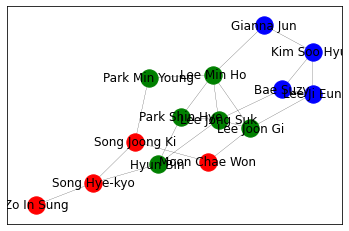

In [ ]:
# Set seed (optional)
np.random.seed(123)

# Obtain the positions of the nodes
pos = nx.spring_layout(G)

# Plot each community seperately for different colors
nx.draw_networkx_nodes(G, pos = pos, nodelist=community_0, node_color='green', label = True)
nx.draw_networkx_nodes(G, pos = pos, nodelist=community_1, node_color='red', label = True)
nx.draw_networkx_nodes(G, pos = pos, nodelist=community_2, node_color='blue', label = True)

# Print out the edges
nx.draw_networkx_edges(G, pos = pos, width = 0.2)

# Make sure the label is printed
nx.draw_networkx_labels(G, pos=pos)

# Show the plot so it supress the other networkx outputs
plt.show()

**Make the Network Prettier**

First, try with nodes. Here, we are multiplying the degree by 100 times so that it is decently large. 

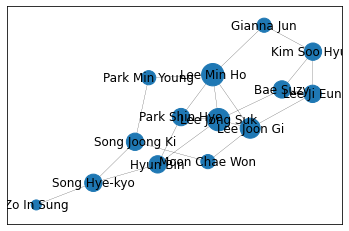

In [ ]:
nx.draw_networkx_nodes(G, pos = pos, nodelist = dict(degree).keys(), node_size = [v * 100 for v in dict(degree).values()], label = True)
nx.draw_networkx_edges(G, pos = pos, width = 0.2)
nx.draw_networkx_labels(G, pos=pos)
plt.show()

We can also try similar things with edges. Edge can be changed depending on the weight on it. Since this is a weighted graph, we can obtain the weight of each edge through get_edge_attributes().

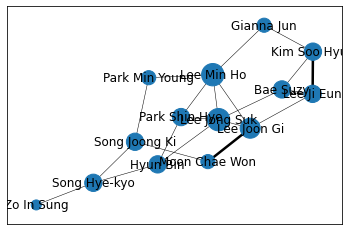

In [ ]:
eWeight = nx.get_edge_attributes(G,'weight')

nx.draw_networkx_nodes(G, pos = pos, nodelist = dict(degree).keys(), node_size = [v * 100 for v in dict(degree).values()], label = True)
nx.draw_networkx_edges(G,pos, width = [5**e/10 for e in eWeight.values()])
nx.draw_networkx_labels(G, pos=pos)

plt.show()

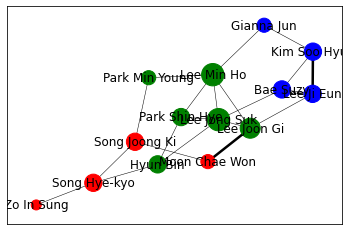

In [ ]:
# Degrees of each community
community_0_degree = {c: dict(degree)[c] for c in community_0}
community_1_degree = {c: dict(degree)[c] for c in community_1}
community_2_degree = {c: dict(degree)[c] for c in community_2}


# Print out the nodes with color and size
nx.draw_networkx_nodes(G, pos = pos, 
                       nodelist=community_0,
                       node_color='green',
                       node_size = [v * 100 for v in community_0_degree.values()],
                       label = True)

nx.draw_networkx_nodes(G, pos = pos,
                       nodelist=community_1,
                       node_size = [v * 100 for v in community_1_degree.values()],
                       node_color='red', label = True)

nx.draw_networkx_nodes(G, pos = pos,
                       nodelist=community_2,
                       node_size = [v * 100 for v in community_2_degree.values()],
                       node_color='blue', label = True)

# Print out the edges with proper width
nx.draw_networkx_edges(G,pos, width = [5**e/10 for e in eWeight.values()])

# Make sure the label is printed
nx.draw_networkx_labels(G, pos=pos)

# Show the plot so it supress the other networkx outputs
plt.show()

**6. Zoom into the important vertices, edges, communities**

**Vertices**

The vertices represent famous Korean actors and actresses. The three vertices we will be looking at are Lee Min Ho, Lee Jong Suk, and Zo In Sung.

In terms of degree centrality, Lee Min Ho and Lee Jong Suk are the two actors with highest degree centrality. They have co-act with five other actors and actresses in the community. In comparison, Zo In Sung has a degress centrality of one which means he only co-act with one other actor/actress in the community which makes him like an outlier. 

Closeness centrality is the level of closeness to all the nodes. In this case, Lee Jong Suk and Lee Min Ho have the highest score of 0.565217 and 0.541667. They are able to reach to the other actors and actresses in a relatively quicker way. Zo In Sung on the other hand has the lowest score of 0.295455.

The Betweenness centrality measures the extent to which a vertex controls communication in a network by estimating how frequently paths through the network include the vertex. Lee Jong Suk and Lee Min Ho have the highest score of 0.261752 and 0.244658. This is because they helps the communication in the community and the paths between the vertices needs to pass through them. However, Zon In Sung on the other hand has a betweenness centrality of 0 which means no communication in the network need to pass through him.


**Edges**

The edges represent the common TV episode the actors and actresses had particiapted in. The thickness is depending on the number of common TV episodes played. 

In the graph above, the edge between Kim Soo Hyun and Lee Ji Eun and between Lee Joon Gi and Moon Chae Won are thicker because they had cooperate in two TV episodes whereas the rest have only one or no common episodes played.

**Communities**

Community 1: ['Hyun Bin', 'Lee Jong Suk', 'Lee Joon Gi', 'Lee Min Ho', 'Park Min Young', 'Park Shin Hye']

Community 2: ['Moon Chae Won', 'Song Hye-kyo', 'Song Joong Ki', 'Zo In Sung']

Community 3: ['Bae Suzy', 'Gianna Jun', 'Kim Soo Hyun', 'Lee Ji Eun']

From the three communities, we can see some patterns.

* In Community 1, Lee Min Ho and Lee Jong Suk are the main charactors for they have 4 edges within the subcommunity. This community is closely connected for the other actors and actresses in the community also have at least one edge and some have two or three.
* In Community 2, the tie is rather loose for the degree centrality in this subcommunity is low.
* In Community 3, Bae Suzy, Gianna Jun, and Lee Ji Eun all cooperated with Kim Soo Hyun in TV episodes. Kim Soo Hyun is the one that formed this subcommunity. And we can name it by "partners with Kim Soo Hyun".


**8. Draw conclusions about this network**

In this social network analysis assignment, we have include 14 famous korean actors and actresses for our analysis. The subcommunities are not that meaningful, but we can get a brief idea about the which actors and actresses have common TV episodes.

We have considered some of the factors that could affect the outcome:

We have only include 14 actors and actresses which could makes the network quite small. More vertices could allow us to see more substantial/ meaningful subcommunities. We have choose the actors and actresses with based on our knowledge, more diversed choices could make the subcommunities easier to recognized.

For the edges, we have only include the TV episodes they have co-act and ignored the movies, variety shows, and other potential cooperate opportunities. Thus, the edges might not be as strong as it could be. The TV episodes also takes a long time to shot and thus it's quite hard for the edges to be strong. We have only looked at the leading roles in the TV episodes and might have missed potential edges. However, this case can be ignored for the actors and actresses we choose are considered as the most "famous" ones.

Our attempt gave us a brief idea about which actors and actresses have worked together and might have known each other. With more data, we will be able to dive deeper into the social network and be able to identify some potential subcommunities maybe by age or by types of TV episodes.